CellChat inference and analysis of spatially proximal cell-cell communication from spatially resolved transcriptomics (multiple datasets)

In [1]:
ptm = Sys.time()

library(CellChat)
library(Seurat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Attaching SeuratObject



In [ ]:
results_folder ='/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/nas-data/fmlab/group_folders/lythgo02/OV_visium/emily/cell2location/cellchat'

In [7]:
#cellTrekObs <- readRDS(paste0(ov_visium, "ov_cellTrek_obj.rds"))
cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/'
adata_vis_match <- zellkonverter::readH5AD(file.path(cell2loc, "final_adata_vis_match.h5ad"))


Warning message:
“The names of these selected uns items have been modified to match R
conventions: '_scvi_manager_uuid' -> 'X_scvi_manager_uuid' and '_scvi_uuid' ->
'X_scvi_uuid'”
Warning message:
“The names of these selected var columns have been modified to match R
conventions: 'n_cells_by_counts-OV_1' -> 'n_cells_by_counts.OV_1',
'mean_counts-OV_1' -> 'mean_counts.OV_1', 'log1p_mean_counts-OV_1' ->
'log1p_mean_counts.OV_1', 'pct_dropout_by_counts-OV_1' ->
'pct_dropout_by_counts.OV_1', 'total_counts-OV_1' -> 'total_counts.OV_1',
'log1p_total_counts-OV_1' -> 'log1p_total_counts.OV_1',
'n_cells_by_counts-OV_2' -> 'n_cells_by_counts.OV_2', 'mean_counts-OV_2' ->
'mean_counts.OV_2', 'log1p_mean_counts-OV_2' -> 'log1p_mean_counts.OV_2',
'pct_dropout_by_counts-OV_2' -> 'pct_dropout_by_counts.OV_2',
'total_counts-OV_2' -> 'total_counts.OV_2', 'log1p_total_counts-OV_2' ->
'log1p_total_counts.OV_2', 'n_cells_by_counts-OV_3' ->
'n_cells_by_counts.OV_3', 'mean_counts-OV_3' -> 'mean_counts.OV_3',

In [ ]:
adata_vis_match[[1]]$

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1111] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1148] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1185] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1222] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1259] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1296] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1370] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1407] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1444] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1481] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1518] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1555] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1592] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1629] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1666] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1703] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1740] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1777] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1814] 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [102]:
distMats <- lapply(cellTrekObs, function(ctOb){
    obCoord <- as.matrix(ctOb@meta.data[,c("coord_x", "coord_y")])
    obDist <- CellChat::computeRegionDistance(obCoord,
                                              meta = ctOb@meta.data,
                                              contact.knn.k=10)
    return(obDist)
})

The above is seeing if it will work if I load Ollie's version unprocessed, still no result

In [77]:
#local
cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/cellTrek/'
ov_visium = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/cellTrek/'

#### Load Visium Data
ovVis <- readRDS(paste0(ov_visium, "celltrek_results.rds"))  #version of Ollie's filtered against mine

#### Load scRNA-seq
ovSc <- readRDS("/home/lythgo02/Documents/OV_visium/upk10_sc_400_newlyAnnot.rds")

In [78]:
#convert updated annotation to factor with levels organised in alphabetical order for plotting purposes 
ovVis <- lapply(ovVis, function(i){
    i$cell_type <- ifelse(grepl("Tumour", i$updated_annotation), "Tumour",  #collapse tumour 1,2,3 subgroups into one 
                                    i$updated_annotation)  
    i$cell_type <- factor(i$cell_type,
                                    levels=sort(unique(i$cell_type)))                                                        
    return(i)
})

In [79]:

ovVis <- lapply(ovVis, function(ovCellTrek) {
    cell_type <- as.character(ovCellTrek@meta.data$cell_type)

    #merge categories with consistently low counts across samples
    cell_type[grepl("Th", cell_type)] <- "T-helper"
    cell_type[grepl("Cycling", cell_type)] <- "Plasma Cells"
    # Add to metadata
    ovCellTrek@meta.data$cell_type_collapsed <- factor(cell_type)

    return(ovCellTrek)
})

In [80]:
ov1 <- ovVis[[1]]
colnames(ov1@meta.data)
unique(ov1@meta.data$cell_type) #from celltrek
summary(ov1@meta.data$coord_x) #dimensions in pixels so will need converting 
ov1@images$slice1@scale.factors
ov1@images$slice1@spot.radius
slotNames(ov1[["RNA"]])


[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_originalexp"              
 [5] "nFeature_originalexp"             "percentMt"                       
 [7] "nCount_SCT"                       "nFeature_SCT"                    
 [9] "SCT_snn_res.1"                    "seurat_clusters"                 
[11] "pANN_0.25_0.19_161"               "DF.classifications_0.25_0.19_161"
[13] "doublet_classification"           "CellAssign"                      
[15] "Treatment"                        "Cell_Type"                       
[17] "newAnnot"                         "newAnnot_1"                      
[19] "inferCNV_Score"                   "inferCNV_Class"                  
[21] "Final_Annotation"                 "CopyKat"                         
[23] "newAnnot_2"                       "pANN_0.25_0.05_197"              
[25] "DF.classifications_0.25_0.05_197" "pANN_0.25_0.19_227"              
[27] "DF.classifications_0.25_0.19_227" "pANN_0.25_0.06_117"              
[29] "DF.classifications_0.25_0.06_117" "pANN_0.25_0.28_314"              
[31] "DF.classifications_0.25_0.28_314" "SCT_snn_res.0.5"                 
[33] "ident"                            "updated_annotation"              
[35] "X_indices"                        "X_scvi_batch"                    
[37] "X_scvi_labels"                    "id_raw"                          
[39] "id_new"                           "coord_x"                         
[41] "coord_y"                          "cell_type"                       
[43] "cell_type_collapsed"

[1] Tumour               Macrophage           Monocytes           
 [4] Th17                 CD4                  CD8                 
 [7] Mesenchymal          Dendritic Cells      Plasma Cells        
[10] B naive activated    NK_cell              Endothelial         
[13] Treg                 Cycling Plasma Cells B naive resting     
[16] Th1                  Neutrophils         
17 Levels: B naive activated B naive resting CD4 CD8 ... Tumour

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8682   11999   14394   14429   16742   20581 

$spot
[1] 0.06443299

$fiducial
[1] 415.707

$hires
[1] 0.06443299

$lowres
[1] 0.0193299

$spot_dis
[1] 397

$spot_dis_intp
[1] 396.0051

attr(,"class")
[1] "scalefactors"

[1] 0.01339262

[1] "counts"        "data"          "scale.data"    "key"          
[5] "assay.orig"    "var.features"  "meta.features" "misc"

Cellchat requires normalised data
 - Ollie appears to have previously used SCTransform which is from the same authors as Cellchat (Seurat lot)
 - In their workflow they appear to use SCT data but this is the residuals after regression (like Z-scaled), given they say to use log normalised data, not scaled, will use NormaliseData function 
 - I am using the output from celltrek as input for cellchat so the normalised data is in obj[["RNA]]@data

Prepare inputs
CHECK CONVERSION OF PIXEL TO UM - CHCK THE LOGIC
 - extract normalised expression values 
 - create metadataframe with labels and treatments 
 - convert spot pixel coordinates to um for spatial.locs

In [81]:
ovVis_input <- lapply(ovVis, function(x) {
  # Extract normalized expression matrix
  data.input <- GetAssayData(x, assay = "RNA", slot = "data")
  
  # Use full metadata from Seurat object directly for CellChat
  meta.input <- x@meta.data
  
  # Convert pixel coordinates to microns
  spot.size <- 65  # theoretical spot size in µm
  pixel.diam <- x@images$slice1@scale.factors$spot_dis  # spot diameter in pixels
  conversion.factor <- spot.size / pixel.diam           # µm per pixel
  
  spatial.locs <- as.matrix(meta.input[, c("coord_x", "coord_y")]) * conversion.factor
  colnames(spatial.locs) <- c("x", "y")
  
  scale.factors <- list(
  spot.diameter = 65,
  spot = x@images$slice1@scale.factors$spot)  # 'spot' is the pixel diameter at full-res
  
  # QC: compute nearest-neighbor distances
  d.spatial <- computeCellDistance(coordinates = spatial.locs,
                                   ratio = 1, tol = spot.size/2)
  cat("Minimum NN distance (µm):", min(d.spatial[d.spatial != 0]), "\n")
  
  # Return list with expression, metadata, spatial coordinates
  list(data = data.input, meta = meta.input, spatial = spatial.locs, scale.factors=scale.factors)
})



Minimum NN distance (µm): 16.1544 
Minimum NN distance (µm): 16.61242 
Minimum NN distance (µm): 16.32836 
Minimum NN distance (µm): 14.77146 
Minimum NN distance (µm): 13.82296 
Minimum NN distance (µm): 16.49941 


Visium spots:
 - The center-to-center distance between spots is ~100 µm (this comes from the array design: ~65 µm spot diameter, ~100 µm spacing).
 - If you were plotting spot coordinates directly, the nearest-neighbor distances between spots should be ~100 µm.
 - CellTrek interpolates cells within each spot. Multiple cells can occupy a single spot or nearby positions so the NN distances between cells are smaller — ~10–20 µm; cell-to-cell rather than spot-to-spot 
 - ~100 µm = nearest spots in Visium
 - ~14 µm = nearest mapped cells after CellTrek

In [ ]:
head(ovVis_input$OV_1$meta)
head(ovVis[[1]]@meta.data[, c("coord_x", "coord_y")])  # raw pixel coords
head(ovVis_input$OV_1$spatial)  
head(ovVis_input$OV_1$data)
ovVis_input$OV_1$scale.factors

In [ ]:
ov1 <- ovVis_input[[1]]
colnames(ov1$meta)
all(rownames(meta) == rownames(coordinates))
table(meta$group)
nrow(ov1$spatial)

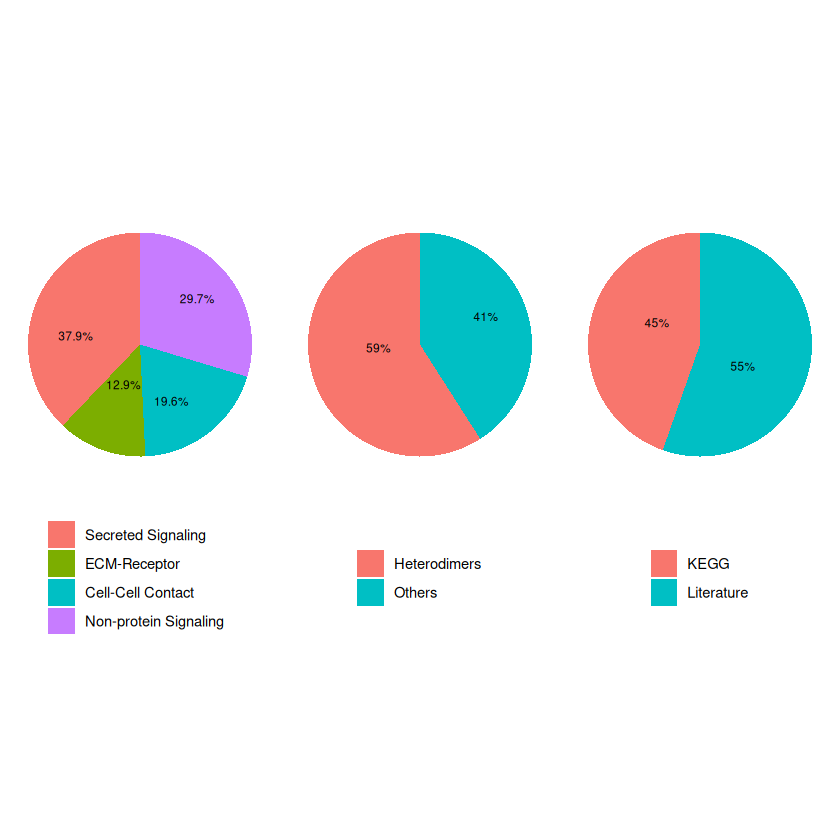

In [82]:
CellChatDB <- CellChatDB.mouse
showDatabaseCategory(CellChatDB)

Pick the subset of the database that you actually want to use

In [83]:

# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
# use all CellChatDB for cell-cell communication analysis
# CellChatDB.use <- CellChatDB # simply use the default CellChatDB

In [84]:


cellchat_list <- lapply(names(ovVis_input), function(sample_name) {
  sample_data <- ovVis_input[[sample_name]]
  
  cellchat <- CellChat::createCellChat(
    object = sample_data$data,
    meta = sample_data$meta,
    group.by = "cell_type_collapsed",                 # adjust to the column name in meta for cell types
    coordinates = sample_data$spatial,
    datatype = "spatial",
    #scale.factors = sample_data$scale.factors,
    spatial.factors = data.frame(ratio = 1, tol = 32.5),  # adjust tol if needed
    do.sparse=TRUE
  )
  
  # Set CellChat database (optional: replace with the specific database you want to use)
  cellchat@DB <- CellChatDB.mouse  # or CellChatDB.use if you loaded a custom DB
  
  return(cellchat)
})

names(cellchat_list) <- names(ovVis_input)



[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = sample_data$data, meta = sample_data$meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated, B naive resting, CD4, CD8, Dendritic Cells, Endothelial, Macrophage, Mesenchymal, Monocytes, Neutrophils, NK_cell, Plasma Cells, T-helper, Treg, Tumour 


In [85]:
cellchat <- cellchat_list[[1]]
levels(cellchat@idents)
groupSize <- as.numeric(table(cellchat@idents)) # cells per type
groupSize
slotNames(cellchat) #data.raw is only populated if you provide the raw counts which aren't actually required by cellchat



[1] "B naive activated" "B naive resting"   "CD4"              
 [4] "CD8"               "Dendritic Cells"   "Endothelial"      
 [7] "Macrophage"        "Mesenchymal"       "Monocytes"        
[10] "Neutrophils"       "NK_cell"           "Plasma Cells"     
[13] "T-helper"          "Treg"              "Tumour"

[1]  157   42  212  127  134  311 1095   84  144   19  176  197   48   69 6461

[1] "data.raw"       "data"           "data.signaling" "data.scale"    
 [5] "data.smooth"    "images"         "net"            "netP"          
 [9] "meta"           "idents"         "DB"             "LR"            
[13] "var.features"   "dr"             "options"

In [86]:

library(presto)

# Subset data to relevant genes and ligand-receptor pairs
cellchat <- subsetData(cellchat)

In [ ]:
cellchat@spatial


In [87]:

cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat, raw.use = FALSE)
cellchat <- filterCommunication(cellchat, min.cells = 10)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)


The number of highly variable ligand-receptor pairs used for signaling inference is 1255 
triMean is used for calculating the average gene expression per cell group. 


Warning message in max(data):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): no rows to aggregate
